In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from StrongFieldIonizer import StrongFieldIonizer, write_sfi_results, load_sfi_results
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm

In [33]:
save = True
name = "sfi_n_time_circular_n_c_3"

In [34]:
# setup simulation and k-space
sim = StrongFieldIonizer()
sim.epsilon = 1.0
sim.t_start = 0.0
sim.t_end   = sim.T
sim.Nc = 3

Up = sim.Up
threshold = 2.0 * np.sqrt(Up)
k_range = [ -threshold, threshold ]
N_ks    = 300

k_ys, k_zs = sim.get_k_space(k_range, N_ks)
Z, Y = np.meshgrid(k_ys, k_zs)

# sweep of values
n_times = np.arange(1, 181, 1).tolist() + np.arange(180, 410, 10).tolist()

all_A_ts = []
all_matrices = []

# run simulations
for n_time in tqdm(n_times) : 
    sim.N_time = n_time
    sim.t_end = sim.T

    A_ts, _, _, matrix = sim.calculate_matrix_elements(k_range=k_range, N_ks=N_ks, progress_bar=False)

    all_A_ts.append(A_ts)
    all_matrices.append(matrix)
    

100%|██████████| 203/203 [18:37<00:00,  5.51s/it]


<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_72127/2318593232.py:40: SyntaxWarning: invalid escape sequence '\m'
  r"$\mathrm{dt} =$"+f"{sim.dt:.2e} [au.]"+"\n"+"$N_{\mathrm{t}} = $"+f"{n_times[i]}",


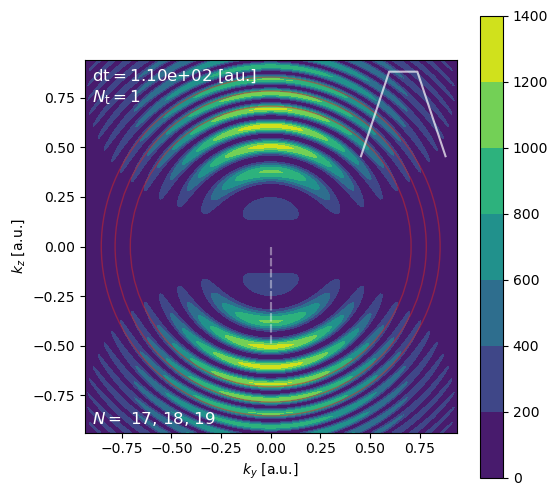

In [35]:
fig = plt.figure(figsize=(6,6))

circle = lambda n : np.sqrt(2*( sim.E0 - sim.Up + n * sim.wl ))


def update(i):
    # clear the whole figure
    fig.clear()

    # retrieve simulation results
    A_ts = all_A_ts[i]
    A_ys, A_zs = -A_ts[1], -A_ts[2]
    A2 = np.sum(A_ts**2, axis=0)
    matrix = all_matrices[i]

    # do all the plotting
    ax = fig.add_subplot(1,1,1)

    cf = ax.contourf(Y, Z, matrix)
    ax.plot(A_ys, A_zs, 'w--', alpha=0.4)

    ns = [17, 18, 19]
    n_string = '$N =$'
    for n in ns : 
        c = plt.Circle((0.0, 0.0), circle(n), color='tab:red', fill=False, alpha=0.5)
        n_string += f' {n}'
        if n is not ns[-1] : n_string += ','
        ax.add_patch(c)

    ax.set_xlabel("$k_y$ [a.u.]")
    ax.set_ylabel("$k_z$ [a.u.]")
    ax.set_aspect('equal')

    fig.colorbar(cf, ax=ax)

    sim.N_time = n_times[i]
    # text label
    ax.text(
        0.02, 0.98,               
        r"$\mathrm{dt} =$"+f"{sim.dt:.2e} [au.]"+"\n"+"$N_{\mathrm{t}} = $"+f"{n_times[i]}",
        transform=ax.transAxes,    
        color='white',             
        va='top', ha='left',       
        fontsize=12                
    )

    # text label
    ax.text(
        0.02, 0.06,               
        n_string,
        transform=ax.transAxes,    
        color='white',             
        va='top', ha='left',       
        fontsize=12                
    )

    # make inset plot
    iax = inset_axes(ax, width="25%", height="25%", loc='upper right', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes)
    # plot envelope profile
    iax.plot(np.arange(len(A2)), A2, color='white', alpha=0.7)
    # make transparent
    iax.set_facecolor((0,0,0,0))
    # remove borders
    for spine in iax.spines.values(): spine.set_visible(False)
    # remove ticks
    iax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


ani = FuncAnimation(fig, update,
                    frames=len(n_times),
                    interval=800,   # ms between frames
                    blit=False)

writer = PillowWriter(fps=12)

if(save) : 
    n = name
else : 
    n = 'test'

ani.save(f"./Animations/{n}.gif", writer=writer)

In [36]:
if(save) : 
    write_sfi_results(outfname=f"./Animations/{name}.txt.gz", simulator=sim, k_range=k_range, N_ks=N_ks, parameters=n_times, all_A_ts=all_A_ts, all_matrices=all_matrices)

In [9]:
print(sim.dt, sim.N_time)

sim.N_time = 5

print(sim.dt, sim.N_time)


1.1023132117858923 100
22.046264235717846 5
